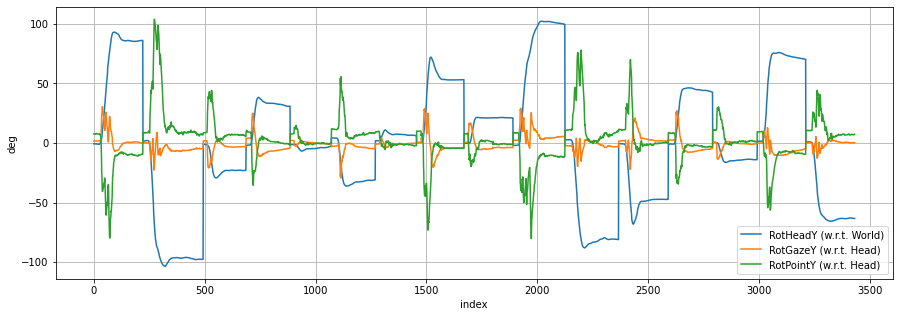

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
DATA_PATH = "../Demo_retargetingGen2/01_recordingFolder"
FILE_NAME = "/fov_horizontal.csv"
file = DATA_PATH + FILE_NAME

df = pd.read_csv(file, sep=",", 
                 names=['Frame', 'Instance', 'TargetID', 'Depth', 'Amp', 'Direction',
                       'PosHMDX', 'PosHMDY', 'PosHMDZ',
                       'PosEyeX', 'PosEyeY', 'PosEyeZ',
                       'PosFingerX', 'PosFingerY', 'PosFingerZ',
                       'ForwardHeadX', 'ForwardHeadY', 'ForwardHeadZ',
                       'ForwardGazeX', 'ForwardGazeY', 'ForwardGazeZ',
                       'ForwardPointX', 'ForwardPointY', 'ForwardPointZ',
                       'QuatHead1', 'QuatHead2', 'QuatHead3', 'QuatHead4',
                       'QuatGaze1', 'QuatGaze2', 'QuatGaze3', 'QuatGaze4',
                       'QuatPoint1', 'QuatPoint2', 'QuatPoint3', 'QuatPoint4',
                       'RotHeadX', 'RotHeadY', 'RotHeadZ',
                       'RotGazeX', 'RotGazeY', 'RotGazeZ',
                       'RotPointX', 'RotPointY', 'RotPointZ'], 
                 header=None)
df.drop(['Depth', 'Amp', 'Direction',
         'PosHMDX', 'PosHMDY', 'PosHMDZ',
         'PosEyeX', 'PosEyeY', 'PosEyeZ',
         'PosFingerX', 'PosFingerY', 'PosFingerZ',
         'ForwardHeadX', 'ForwardHeadY', 'ForwardHeadZ', 
         'ForwardGazeX', 'ForwardGazeY', 'ForwardGazeZ',
         'ForwardPointX', 'ForwardPointY', 'ForwardPointZ',
         'QuatHead1', 'QuatHead2', 'QuatHead3', 'QuatHead4',
         'QuatGaze1', 'QuatGaze2', 'QuatGaze3', 'QuatGaze4',
         'QuatPoint1', 'QuatPoint2', 'QuatPoint3', 'QuatPoint4'], axis='columns', inplace=True)

cols = ['Frame', 'Instance', 'TargetID',
        'RotHeadX', 'RotHeadY', 'RotHeadZ',
        'RotGazeX', 'RotGazeY', 'RotGazeZ',
        'RotPointX', 'RotPointY', 'RotPointZ']
df = df[cols]

# drop high frameTime cell
df = df.loc[df.Frame < 40]
df.reset_index(drop = True, inplace=True)

# convert angles (0 ~ 360) to (-180 ~ 180)
angles = df.loc[:, 'RotHeadX':]
df.loc[:, 'RotHeadX':] = angles.applymap(lambda x: x-360.0 if x>180.0 else x)

# adjust Gaze values (w.r.t Head)
df.loc[:, 'RotGazeX':'RotGazeZ'] = df.loc[:, 'RotGazeX': 'RotGazeZ'] + df.loc[:, 'RotHeadX': 'RotHeadZ'].values

# adjust Point values (w.r.t Head)
df.loc[:, 'RotPointX': 'RotPointZ'] = df.loc[:, 'RotPointX': 'RotPointZ'] - df.loc[:, 'RotHeadX': 'RotHeadZ'].values

# cumulative Frame time
df['Frame'] = df['Frame'].cumsum()


df.plot(x='Frame', y=['RotHeadY', 'RotGazeY', 'RotPointY'], figsize=(15,5), grid=True)
plt.xlabel('ms')
#df.plot(use_index=True, y=['RotHeadY', 'RotGazeY', 'RotPointY'], figsize=(15,5), grid=True)
#plt.xlabel('index')
plt.ylabel('deg')
plt.legend(['RotHeadY (w.r.t. World)', 'RotGazeY (w.r.t. Head)', 'RotPointY (w.r.t. Head)'])